# Hands-on Exercise
For `session 03 - Diamonds with SQL`!
In this lab session we will discuss:
  - Data collection from SQL database using SQLite Python.
  - Basic data exploration using pandas.
  - Basic data visualization using matplotlib.

### Dataset Description

| Label     | Description                                                                                       |
|-----------|---------------------------------------------------------------------------------------------------|
| carat     | weight of the diamond (0.2--5.01)                                                                 |
| cut       | quality of the cut (Fair, Good, Very Good, Premium, Ideal)                                        |
| color     | diamond color, from J (worst) to D (best)                                                         |
| clarity   | a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) |
| x         | length in mm (0--10.74)                                                                           |
| y         | width in mm (0--58.9)                                                                             |
| z         | depth in mm (0--31.8)                                                                             |
| depth     | total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)                                |
| table     | width of the top of diamond relative to widest point (43--95)                                     |
| price     | price in US dollars (\$326--\$18,823)                                                             |

## Install Dependencies

In [1]:
!pip install db-sqlite3

Defaulting to user installation because normal site-packages is not writeable


## Import Libraries

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

## Data Collection & Exploration

In [3]:
conn = sqlite3.connect("diamonds.db")

In [4]:
cursor = conn.cursor()

In [5]:
query = "SELECT name FROM sqlite_master;"
cursor.execute(query)
cursor.fetchall()

[('Observation',), ('Cut',), ('Color',), ('Clarity',)]

In [6]:
query = "PRAGMA table_info(Observation)"
pd.read_sql_query(query, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,carat,FLOAT,0,None,0
1,1,depth,FLOAT,0,None,0
2,2,table,FLOAT,0,None,0
3,3,price,BIGINT,0,None,0
4,4,x,FLOAT,0,None,0
5,5,y,FLOAT,0,None,0
6,6,z,FLOAT,0,None,0
7,7,cut_id,BIGINT,0,None,0
8,8,color_id,BIGINT,0,None,0
9,9,clarity_id,BIGINT,0,None,0


In [7]:
query = "SELECT * FROM Observation;"
pd.read_sql(query, conn).head()

,carat,depth,table,price,x,y,z,cut_id,color_id,clarity_id
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3,1,2
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,1,4
3,0.29,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,6,3


In [8]:
query = "SELECT * FROM Cut;"
pd.read_sql(query, conn).head()

,cut_id,cut
0,0,Fair
1,1,Good
2,2,Ideal
3,3,Premium
4,4,Very Good


In [9]:
query = "SELECT * FROM Color;"
pd.read_sql(query, conn).head()

,color_id,color
0,0,D
1,1,E
2,2,F
3,3,G
4,4,H


In [10]:
query = "SELECT * FROM Clarity;"
pd.read_sql(query, conn).head()

,clarity_id,clarity
0,0,I1
1,1,IF
2,2,SI1
3,3,SI2
4,4,VS1


In [11]:
query = """
SELECT *
FROM Observation
JOIN Cut ON Observation.cut_id = Cut.cut_id
JOIN Color ON Observation.color_id = Color.color_id
JOIN Clarity ON Observation.clarity_id = Clarity.clarity_id;
"""
pd.read_sql(query, conn).head()

,carat,depth,table,price,x,y,z,cut_id,color_id,clarity_id,cut_id,cut,color_id,color,clarity_id,clarity
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,1,3,2,Ideal,1,E,3,SI2
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3,1,2,3,Premium,1,E,2,SI1
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,1,4,1,Good,1,E,4,VS1
3,0.29,62.4,58.0,334,4.20,4.23,2.63,3,5,5,3,Premium,5,I,5,VS2
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,6,3,1,Good,6,J,3,SI2


In [12]:
query = """
SELECT o.carat, o.depth, o."table", o.price, o.x, o.y, o.z, cu.cut, cl.clarity
FROM Observation AS o
JOIN Cut AS cu ON o.cut_id = cu.cut_id
JOIN Color AS co ON o.color_id = co.color_id
JOIN Clarity AS cl ON o.clarity_id = cl.clarity_id;
"""
df = pd.read_sql(query, conn)
df

,carat,depth,table,price,x,y,z,cut,clarity
0,0.23,61.5,55.0,326,3.95,3.98,2.43,Ideal,SI2
1,0.21,59.8,61.0,326,3.89,3.84,2.31,Premium,SI1
2,0.23,56.9,65.0,327,4.05,4.07,2.31,Good,VS1
3,0.29,62.4,58.0,334,4.20,4.23,2.63,Premium,VS2
4,0.31,63.3,58.0,335,4.34,4.35,2.75,Good,SI2
...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,Ideal,SI1
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,Good,SI1
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,Very Good,SI1
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,Premium,SI2


## Data Visualization

### Using matplotlib

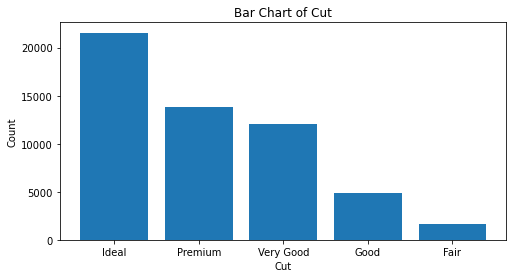

In [13]:
bar_samples = df['cut'].value_counts()

plt.figure(figsize=(8, 4))
plt.bar(bar_samples.index, bar_samples)
plt.title('Bar Chart of Cut')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()

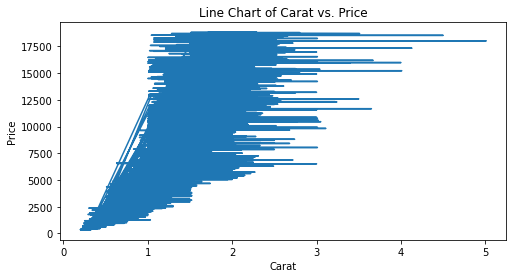

In [14]:
plt.figure(figsize=(8, 4))
plt.plot(df['carat'].values, df['price'].values)
plt.title('Line Chart of Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

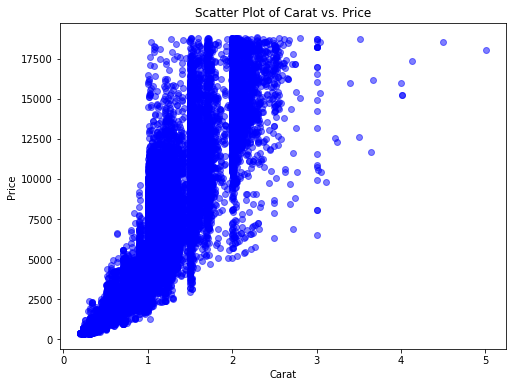

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['carat'], df['price'], c='blue', alpha=0.5)
plt.title('Scatter Plot of Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

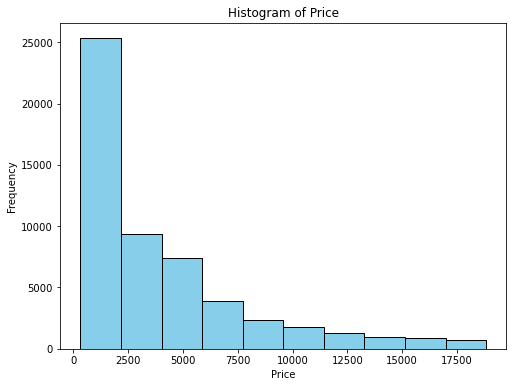

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Using pandas

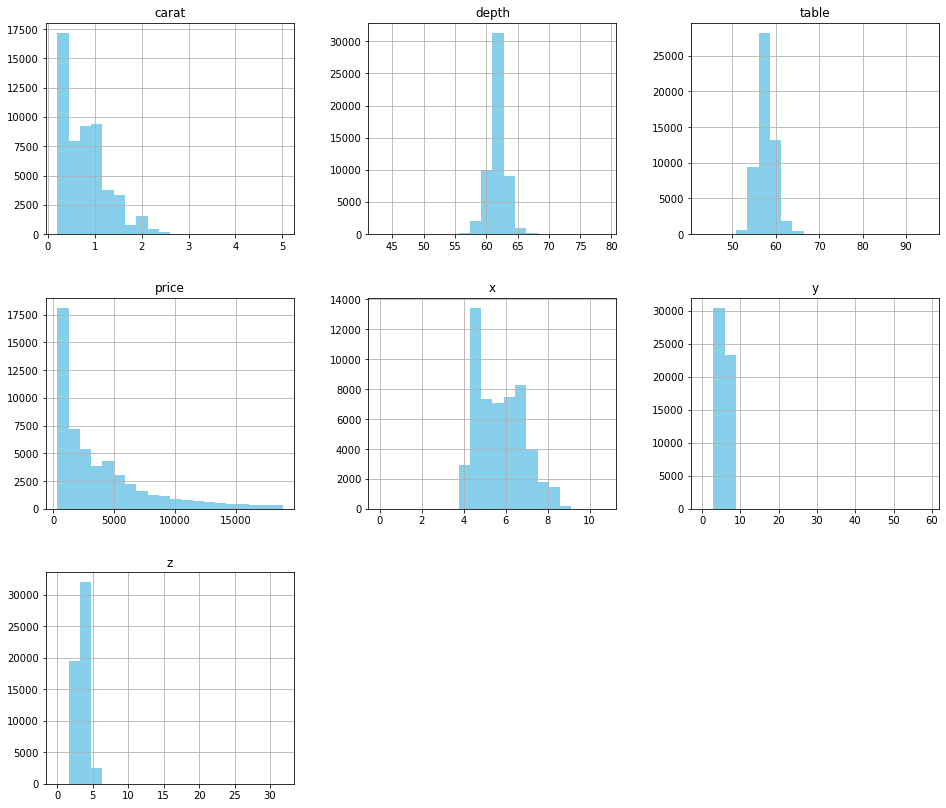

In [17]:
df.hist(figsize=(16, 14), color='skyblue', bins=20)
plt.show()

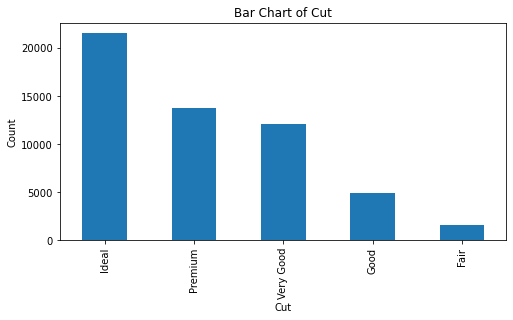

In [18]:
plt.figure(figsize=(8, 4))
df['cut'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Cut')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()

<Figure size 576x288 with 0 Axes>

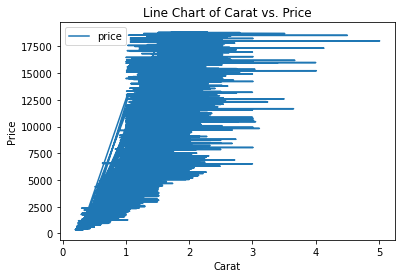

In [19]:
plt.figure(figsize=(8, 4))
df.plot(x='carat', y='price')
plt.title('Line Chart of Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

<Figure size 1152x864 with 0 Axes>

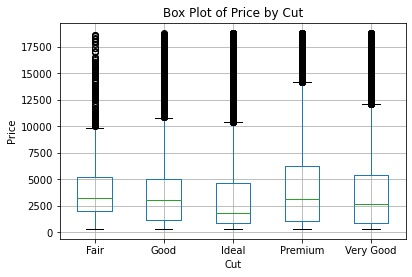

In [20]:
plt.figure(figsize=(16, 12))
df.boxplot(column='price', by='cut')
plt.title('Box Plot of Price by Cut')
plt.suptitle('') 
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

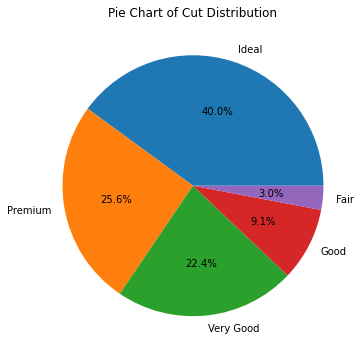

In [21]:
plt.figure(figsize=(6, 6))
df['cut'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart of Cut Distribution')
plt.ylabel('') 
plt.show()